# 過去ログからより良いエントリポイントを探求

### システムパスに一つ上のディレクトリ .. を追加

In [1]:
import sys
sys.path.append('..')

## ライブラリのインポート

In [2]:
import datetime
import re

from matplotlib import (
    dates as mdates,
    font_manager as fm,
    pyplot as plt,
    ticker as ticker,
)
import numpy as np
import pandas as pd

from funcs.plots import getMajorXTicks
from funcs.preprocs_no_qt import (
    get_date_formatted,
    get_ohlc4analysis,
    get_tick4analysis,
)

In [23]:
code = '7203'
#code = '8306'
dateStr = '20250305'
ohlc_csv = '../ohlc1m/ohlc1m_%s_%s.csv' % (code, dateStr)
tick_csv = '../tick/tick_%s_%s.csv' % (code, dateStr)

## 過去ログ (OHLC) の読み込み

In [24]:
df = pd.read_csv(ohlc_csv)
df

,銘柄名称,市場名称,足種,日付,時刻,始値,高値,安値,終値,出来高,...,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
0,トヨタ自動車,東証,1M,2025/03/04,15:30,2753.5,2753.5,2753.5,2753.5,4624400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2025/03/05,09:00,2775.0,2803.0,2765.0,2802.5,2545000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2025/03/05,09:01,2801.5,2812.5,2797.5,2810.5,531500,...,2786.38,2805.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2025/03/05,09:02,2810.0,2825.5,2807.5,2825.0,627100,...,2795.94,2817.00,1.0,2825.5,0.02,2825.5,0.0,0.0,NaN,15.5
4,NaN,NaN,NaN,2025/03/05,09:03,2826.0,2838.0,2825.0,2830.5,570400,...,2806.47,2829.88,-1.0,2838.0,0.02,2825.5,0.0,0.0,NaN,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,NaN,NaN,NaN,2025/03/05,15:27,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,2025/03/05,15:28,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,2025/03/05,15:29,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,2025/03/05,15:30,2849.5,2849.5,2849.5,2849.5,5702000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## OHLC データを Matplotlib で扱いやすいように整形

In [25]:
df = get_ohlc4analysis(df)
df

,Open,High,Low,Close,Volume,H_Open,H_High,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
2025-03-05 09:00:00,2775.0,2803.0,2765.0,2802.5,2545000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 09:01:00,2801.5,2812.5,2797.5,2810.5,531500.0,2786.38,2812.5,2786.38,2805.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 09:02:00,2810.0,2825.5,2807.5,2825.0,627100.0,2795.94,2825.5,2795.94,2817.00,1.0,2825.50,0.02,2825.5,0.0,0.0,NaN,15.5
2025-03-05 09:03:00,2826.0,2838.0,2825.0,2830.5,570400.0,2806.47,2838.0,2806.47,2829.88,-1.0,2838.00,0.02,2825.5,0.0,0.0,NaN,25.5
2025-03-05 09:04:00,2829.5,2838.0,2827.5,2832.0,498200.0,2818.17,2838.0,2818.17,2831.75,1.0,2818.17,0.02,2838.0,0.0,0.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-05 15:26:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 15:27:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 15:28:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 15:29:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 過去ログ (Tick) の読み込み

In [26]:
df_tick = pd.read_csv(tick_csv)
df_tick

,Time,Price
0,09:00:00,2775.0
1,09:00:01,2773.5
2,09:00:04,2765.5
3,09:00:06,2765.5
4,09:00:07,2770.0
...,...,...
8668,15:24:52,2849.0
8669,15:24:55,2849.5
8670,15:24:57,2848.0
8671,15:24:59,2849.5


## Tick データを Matplotlib で扱いやすいように整形

In [27]:
dateFmt = get_date_formatted(dateStr)
df_tick = get_tick4analysis(df_tick, dateFmt)
df_tick

,Price
Datetime,
2025-03-05 09:00:00,2775.0
2025-03-05 09:00:01,2773.5
2025-03-05 09:00:04,2765.5
2025-03-05 09:00:06,2765.5
2025-03-05 09:00:07,2770.0
...,...
2025-03-05 15:24:52,2849.0
2025-03-05 15:24:55,2849.5
2025-03-05 15:24:57,2848.0


## ポジション・オープン条件

In [28]:
def timing_position_open(df: pd.DataFrame) -> pd.DataFrame:
    price_delta_min = 0.5
    level_slope = 2
    level_iqr = 4
    #return df[(price_delta_min * level_slope < df['Slope']) & (price_delta_min * level_iqr < df['IQR'])]
    return df[(df['Period'] == 1) & (0 < df['Slope'])]

timing_position_open(df)

,Open,High,Low,Close,Volume,H_Open,H_High,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
2025-03-05 09:07:00,2831.0,2838.0,2830.0,2834.5,360600.0,2826.43,2838.00,2826.43,2833.38,1.0,2838.00,0.04,2818.97,1.0,2.5,2.5,11.13
2025-03-05 09:17:00,2835.0,2835.5,2827.0,2827.0,234100.0,2840.18,2840.18,2827.00,2831.13,-1.0,2827.00,0.04,2850.04,1.0,8.0,8.0,6.50
2025-03-05 09:29:00,2822.5,2828.5,2822.5,2827.5,149200.0,2812.62,2828.50,2812.62,2825.25,1.0,2828.50,0.04,2802.58,1.0,5.5,5.5,4.00
2025-03-05 10:02:00,2834.0,2834.5,2832.0,2834.0,81900.0,2830.40,2834.50,2830.40,2833.63,1.0,2834.50,0.04,2825.86,1.0,0.5,0.5,1.00
2025-03-05 10:25:00,2827.0,2829.5,2826.5,2829.0,34600.0,2824.45,2829.50,2824.45,2828.00,1.0,2829.50,0.04,2821.34,1.0,2.5,2.5,2.00
2025-03-05 10:32:00,2828.5,2830.0,2822.0,2825.5,59700.0,2827.78,2830.00,2822.00,2826.50,-1.0,2822.00,0.04,2832.56,1.0,3.0,3.0,4.50
2025-03-05 10:37:00,2830.0,2832.5,2830.0,2831.0,46700.0,2828.92,2832.50,2828.92,2830.88,1.0,2832.50,0.04,2822.42,1.0,1.5,1.5,2.00
2025-03-05 10:57:00,2831.0,2831.0,2829.0,2830.5,45000.0,2831.54,2831.54,2829.00,2830.38,-1.0,2829.00,0.04,2834.76,1.0,0.5,0.5,1.00
2025-03-05 11:06:00,2832.0,2833.0,2831.0,2833.0,37700.0,2831.73,2833.00,2831.00,2832.25,1.0,2833.00,0.04,2829.16,1.0,0.5,0.5,0.63
2025-03-05 11:11:00,2830.0,2831.0,2827.0,2828.0,50200.0,2831.31,2831.31,2827.00,2829.00,-1.0,2827.00,0.04,2832.76,1.0,2.0,2.0,1.50


## チャート

### フォント設定

In [29]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14

### 多段プロット

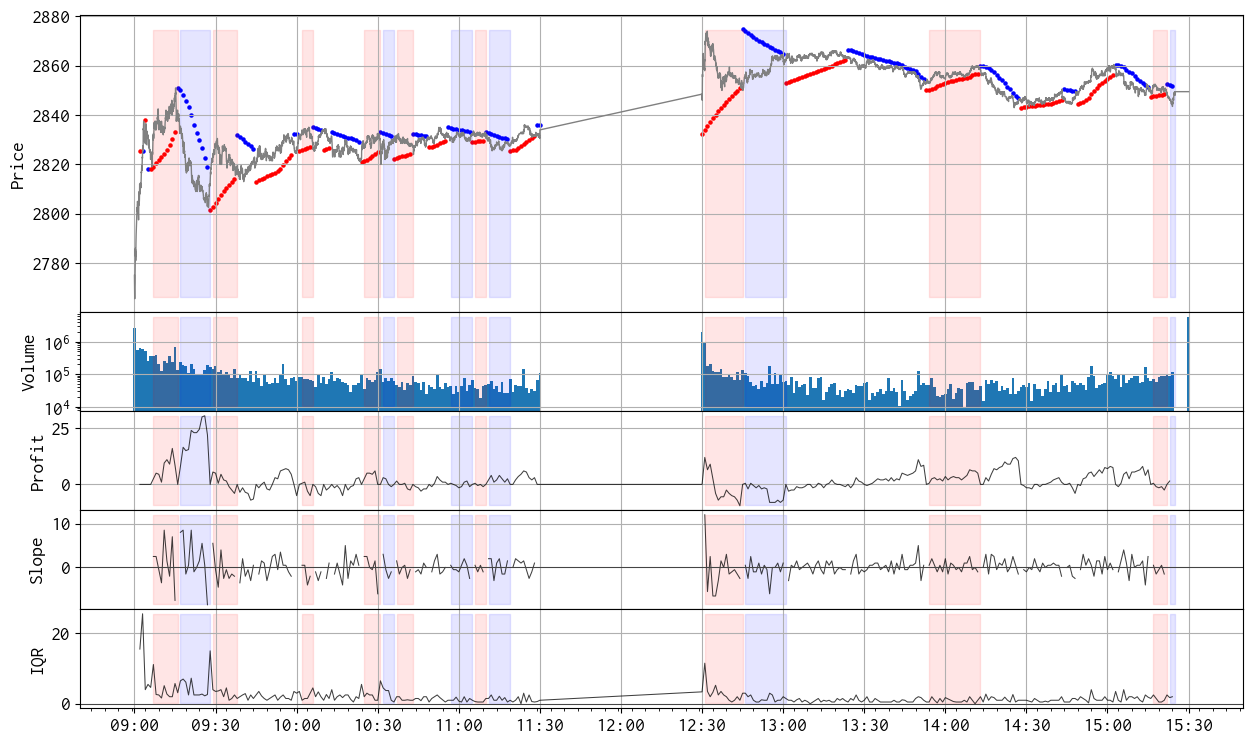

In [30]:
fig = plt.figure(figsize=(15, 9))

n = 5
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
ax = dict()
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Tick
ax[0].plot(df_tick, linewidth=1, color='gray',)

# PSAR bear - Downward trend
df_bear = df[df['TREND'] < 0]
ax[0].scatter(x=df_bear.index, y=df_bear['PSAR'], color='blue', s=5,)

# PSAR bull - Upward trend
df_bull = df[df['TREND'] > 0]
ax[0].scatter(x=df_bull.index, y=df_bull['PSAR'], color='red', s=5,)

tick_position, tick_labels = getMajorXTicks(df)
ax[0].set_xticks(ticks=tick_position, labels=tick_labels,)
ax[0].xaxis.set_minor_locator(mdates.MinuteLocator(interval=5))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[0].set_ylabel('Price')

td = datetime.timedelta(minutes=1)
ax[1].bar(
    df.index,
    df['Volume'],
    width=td,
)
ax[1].set_yscale('log')
ax[1].set_ylabel('Volume')

# Diff
ax[2].plot(
    df['Diff'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[2].set_ylabel('Profit')

# Slope
ax[3].plot(
    df['Slope'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[3].axhline(
    0,
    linewidth=0.75,
    color='#444',
)
ax[3].set_ylabel('Slope')

# IQR
ax[4].plot(
    df['IQR'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[4].axhline(
    0,
    linewidth=0.75,
    color='#444',
)
ax[4].set_ylabel('IQR')

# 売買タイミング
df_position = timing_position_open(df)
position = False
trend = None
t0 = None

for t in df.index:
    if position:
        if trend != df.at[t, 'TREND']:
            if trend == 1:
                fcolor = 'red'
            elif trend == -1:
                fcolor = 'blue'
            else:
                fcolor = 'gray'

            for i in ax.keys():
                ax[i].fill_between(
                    [t0, t], 0.05, 0.95,
                    color=fcolor,
                    alpha=0.1,
                    transform=ax[i].get_xaxis_transform(),
                )
            position = False 
    else:
        if t in df_position.index:
            t0 = t
            trend = df.at[t, 'TREND']
            position = True

plt.show()

# シンプルな売買シミュレーション

---
### 課題

トレンド反転後、period = 1 でエントリして、どれだけ収益を最大化できるか？

### 建玉管理クラス

In [48]:
class PositionManager:
    def __init__(self, unit):
        self.unit = unit
        self.trend = 0
        self.price = 0
        self.total = 0

        dict_columns = {
            'Datetime': [],
            'Position': [],
            'Price': [],
            'Profit': [],
            'Note': [],
        }
        df = pd.DataFrame.from_dict(dict_columns)
        self.df_order = df.astype(object)

    def open(self, t, price, note=''):
        self.price = price
        self.trend = trend

        if self.trend > 0:
            msg = '買建'
        elif self.trend < 0:
            msg = '売建'
        else:
            msg = '不明'

        r = len(self.df_order)
        self.df_order.at[r, 'Datetime'] = t
        self.df_order.at[r, 'Position'] = msg
        self.df_order.at[r, 'Price'] = self.price
        self.df_order.at[r, 'Note'] = note
    
    def close(self, t, price, note=''):
        if self.trend > 0:
            msg = '売埋'
            profit = (price - self.price) * self.unit
        elif self.trend < 0:
            msg = '買埋'
            profit = (self.price - price) * self.unit
        else:
            msg = '不明'
            profit = 0
        
        r = len(self.df_order)
        self.df_order.at[r, 'Datetime'] = t
        self.df_order.at[r, 'Position'] = msg
        self.df_order.at[r, 'Price'] = price
        self.df_order.at[r, 'Profit'] = profit
        self.df_order.at[r, 'Note'] = note

        self.price = 0
        self.total += profit

    def has_position(self):
        if self.price > 0:
            return True
        else:
            return False

    def set_trend(self, trend):
        self.trend = trend

    def get_trend(self):
        return self.trend

    def get_total(self):
        return int(self.total)

    def get_order_history(self):
        return self.df_order

### ループ

In [49]:
# 時間定数
dt_start = pd.to_datetime('%s 09:00:00' % dateFmt)
dt_end = pd.to_datetime('%s 15:24:50' % dateFmt)
td = datetime.timedelta(seconds=1)

unit = 100
posman = PositionManager(unit)

total = 0

t = dt_start
while t <= dt_end:
    if t in df_tick.index:
        # 現在価格の更新
        price = df_tick.at[t, 'Price']

    # 1 秒後にトレンド確認
    t_target = t - td
    if t_target.second == 0:
        # トレンドが更新されるのは分単位（= 0 秒）
        # 算出された 1 秒後に売買情報を更新
        if t_target in df.index:
            trend = df.at[t_target, 'TREND']
            period = df.at[t_target, 'Period']
            diff = df.at[t_target, 'Diff']
            slope = df.at[t_target, 'Slope']
            iqr = df.at[t_target, 'IQR']

            if np.isnan(trend):
                # nan だったら何もしない
                pass
    
            # トレンド反転か判定
            elif posman.get_trend() != trend:
                # 建玉を持って入れば返済
                if posman.has_position():
                    posman.close(t, price)

                # 保持しているトレンドを更新
                posman.set_trend(trend)

            elif period == 1:
                # エントリ条件
                if 0 < slope:
                    posman.open(t, price)
            else:
                pass
        else:
            pass
    else:
        pass

    # 時刻を１秒インクリメント
    t += td

# まだ建玉を持っていれば返済
if posman.has_position():
    posman.close(t_target, price, '強制')

print(posman.get_order_history())
total = posman.get_total()
print('---\n実現損益', '{:+}'.format(total))

delta = df['High'].max() - df['Low'].min()
print('パフォーマンス {:+.1f}%'.format(total/delta))

               Datetime Position   Price  Profit Note
0   2025-03-05 09:07:01       買建  2831.0     NaN     
1   2025-03-05 09:16:01       売埋  2840.0   900.0     
2   2025-03-05 09:17:01       売建  2835.0     NaN     
3   2025-03-05 09:28:01       買埋  2813.0  2200.0     
4   2025-03-05 09:29:01       買建  2824.0     NaN     
5   2025-03-05 09:38:01       売埋  2819.5  -450.0     
6   2025-03-05 10:02:01       買建  2834.0     NaN     
7   2025-03-05 10:06:01       売埋  2829.0  -500.0     
8   2025-03-05 10:25:01       買建  2827.0     NaN     
9   2025-03-05 10:31:01       売埋  2826.5   -50.0     
10  2025-03-05 10:32:01       売建  2828.5     NaN     
11  2025-03-05 10:36:01       買埋  2829.5  -100.0     
12  2025-03-05 10:37:01       買建  2830.0     NaN     
13  2025-03-05 10:43:01       売埋  2827.5  -250.0     
14  2025-03-05 10:57:01       売建  2831.0     NaN     
15  2025-03-05 11:05:01       買埋  2832.5  -150.0     
16  2025-03-05 11:06:01       買建  2832.0     NaN     
17  2025-03-05 11:10:01     